<a href="https://colab.research.google.com/github/ikwak2/StatBook/blob/main/ch9/9_8_python_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.8 Python 연습

9.6 엑셀 연습과 마찬가지로 [표 10-1]에 주어진 자료를 이용하여 회귀분석을 실시한다.

## 자료 입력 


현재 폴더로 예제파일 ex9.csv 파일을 다운받습니다. 


In [1]:
!wget https://raw.githubusercontent.com/ikwak2/StatBook/main/ch9/ex9.csv

--2023-05-18 05:40:09--  https://raw.githubusercontent.com/ikwak2/StatBook/main/ch9/ex9.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338 [text/plain]
Saving to: ‘ex9.csv’

ex9.csv             100%[===================>]     338  --.-KB/s    in 0s      

2023-05-18 05:40:09 (14.2 MB/s) - ‘ex9.csv’ saved [338/338]



In [2]:
import pandas as pd

x = pd.read_csv("ex9.csv")
print(x)

    Day  Wind   GHI  Power
0     1   3.5  1.08   56.3
1     2   2.5  1.73   94.1
2     3   1.9  1.69   92.6
3     4   2.5  1.27   52.2
4     5   2.4  1.76   96.0
5     6   2.1  1.70   92.0
6     7   3.6  1.39   74.5
7     8   4.9  1.74   95.3
8     9   0.8  1.30   62.6
9    10   3.0  0.61   36.3
10   11   0.9  1.51   72.7
11   12   2.9  1.32   49.9
12   13   2.4  1.69   83.4
13   14   1.2  0.97   21.3
14   15   3.0  1.26   51.9
15   16   2.9  1.84   98.3
16   17   4.5  1.83   99.2
17   18   1.9  1.71   89.3
18   19   2.0  1.27   59.3
19   20   3.8  0.35   30.2


pd.read_csv 명령어를 이용하여 ex9 파일을 x에 저장한다. 첫 번째 변수 Day는 날짜, 두번째 변수 Wind는 풍속, 세 번째 변수 GHI는 일사량, 네 번째 변수 Power은 태양광 발전량이다.

## 일사량과 태양광 발전량의 산포도 구하기

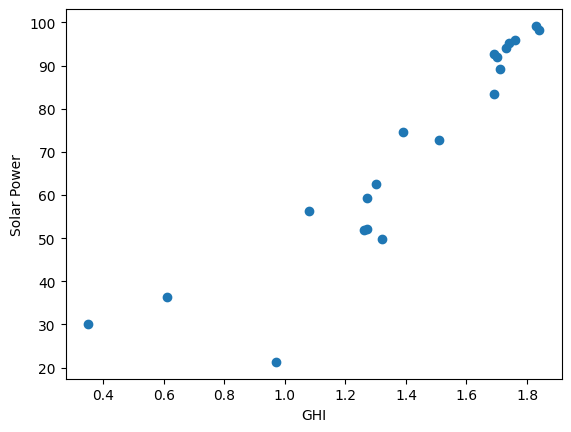

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(x['GHI'], x['Power'], 'o')
plt.xlabel('GHI')
plt.ylabel('Solar Power')
plt.show()

## 풍속과 태양광 발전량, 일사량과 태양광 발전량의 상관계수
### 풍속과 태양광 발전량의 상관계수

In [5]:
x['Wind'].corr(x['Power'])

0.1451348842561516

In [7]:
## 참고: 전체상관계수행렬 구하는 방법
x.corr()

,Day,Wind,GHI,Power
Day,1.000000,0.047926,-0.211060,-0.232978
Wind,0.047926,1.000000,-0.032056,0.145135
GHI,-0.211060,-0.032056,1.000000,0.917906
Power,-0.232978,0.145135,0.917906,1.000000


### 일사량과 태양광 발전량의 상관계수

In [8]:
x['GHI'].corr(x['Power'])

0.9179055300185481

## 회귀분석

In [22]:
from statsmodels.formula.api import ols

model = ols('Power ~ Wind + GHI', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.46
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.40e-08
Time:                        06:08:40   Log-Likelihood:                -71.385
No. Observations:                  20   AIC:                             148.8
Df Residuals:                      17   BIC:                             151.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.2881      9.341     -1.958      0.067     -37.995       1.419
Wind           3.9792      1.969      2.021      0.059      -0.175       8.133
GHI           55.7980      5.224     10.681      0.000      44.777      66.819
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.044
Skew:                          -0.780   Prob(JB):                        0.360
Kurtosis:                       2.859   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

명령어 statsmodels.formula.api.ols 를 이용하여 회귀분석을 실시한다. 명령문에서 괄호 안은 회귀식, 사용할 자료명 순이다. ‘~’ 기호 앞의 변수는 종속변수, 기호 뒤의 변수들은 독립변수이다. 두 개 이상의 종속변수가 필요한 경우 ‘+’ 기호를 사용하여 추가한다. 위의 식은 태양광 발전량(Power)에 대한 풍속(Wind)과 일사량(GHI)의 영향을 알기 위한 식이다. 사용하는 자료 x 안에 식에 사용되는 변수 Power, Wind, GHI가 포함되어 있어야 한다. .summary 명령어를 이용하면 회귀분석의 정리된 결과를 볼 수 있다.  
위 결과에 의할 때 태양광 발전량에 대한 풍속, 일사량의 회귀식은  
$\hat{Y} = -18.288 + 3.979 X_1 + 55.798X_2$
와 같다.

In [20]:
## 또 다른 방법 참고
import statsmodels.api as sm

x = sm.add_constant(x)
model2 = sm.OLS(x['Power'], x[['const', 'Wind', 'GHI']])
results = model2.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Power   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.46
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.40e-08
Time:                        06:06:44   Log-Likelihood:                -71.385
No. Observations:                  20   AIC:                             148.8
Df Residuals:                      17   BIC:                             151.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2881      9.341     -1.958      0.0

In [23]:
import statsmodels.api as sm

anova_table = sm.stats.anova_lm(model)

print(anova_table)

            df       sum_sq      mean_sq           F        PR(>F)
Wind       1.0   244.741273   244.741273    2.820781  1.113341e-01
GHI        1.0  9899.138750  9899.138750  114.093163  5.841573e-09
Residual  17.0  1474.981977    86.763646         NaN           NaN


위와같이 sm.stats.anova_lm 함수를 통해 분산분석표를 확인할 수 있다.

In [24]:
model.fittedvalues

0      55.900832
1      88.190353
2      83.570925
3      62.523272
4      89.466375
5      84.924741
6      73.596131
7      98.298365
8      57.432606
9      27.686181
10     69.548105
11     66.904845
12     85.560515
13     40.610938
14     63.954882
15     95.919805
16    101.728514
17     84.686885
18     60.533682
19     16.362045
dtype: float64

In [25]:
model.resid

0      0.399168
1      5.909647
2      9.029075
3    -10.323272
4      6.533625
5      7.075259
6      0.903869
7     -2.998365
8      5.167394
9      8.613819
10     3.151895
11   -17.004845
12    -2.160515
13   -19.310938
14   -12.054882
15     2.380195
16    -2.528514
17     4.613115
18    -1.233682
19    13.837955
dtype: float64

model에 저장된 회귀분석 결과값 중 적합값과 잔차를 따로 살펴볼 수 있다.